## Reading CSV and TXT files

Rather than creating `Series` or `DataFrames`strutures from scratch, or even from Python core sequences or `ndarrays`, the most typical use of pandas is based on the loading of information from files or sources of information for further `exploration`, `transformation` and `analysis`.

In this lecture we'll learn how to read comma-separated values files (.csv) and raw text files (.txt) into pandas `DataFrames`.

In [489]:
import pandas as pd

### **Reading data with Python**

As we saw on previous courses we can read data simply using Python.

When you want to work with a file, the first thing to do is to open it. This is done by invoking the `open()` built-in function.

`open()` has a single required argument that is the path to the file and has a single return, the file object.

The `with` statement automatically takes care of closing the file once it leaves the `with` block, even in cases of error.


In [490]:
filepath = 'files/btc-market-price.csv'

with open(filepath, 'r') as reader:
    print(reader)

<_io.TextIOWrapper name='files/btc-market-price.csv' mode='r' encoding='utf-8'>


In [491]:
filepath = 'files/btc-market-price.csv'

with open(filepath, 'r') as reader:
    for index, line in enumerate(reader.readlines()):
        if (index < 10): # reading only first 10 lines
            print(index, line)

0 2/4/17 0:00,1099.169125

1 3/4/17 0:00,1141.813

2 4/4/17 0:00,?

3 5/4/17 0:00,1133.079314

4 6/4/17 0:00,-

5 7/4/17 0:00,-

6 8/4/17 0:00,1181.149838

7 9/4/17 0:00,1208.8005

8 10/4/17 0:00,1207.744875

9 11/4/17 0:00,1226.617038



---

### **Reading data with Pandas**

Probably one of the most recurrent types of work for data analysis: public data sources, logs, historical information tables, exports from databases. So the `pandas` library offers us functions to read and write files in multiple formats like CSV, JSON, XML and Excel's XLSX, all of them creating a `DataFrame` with the information read from the file.

We'll learn how to read different type of data including:

*  CSV files (.csv)
*  Raw text files (.txt)
*  JSON and data from a file and from an API
*  Data from a SQL query over a database

There are many other available reading functions as the following table shows:

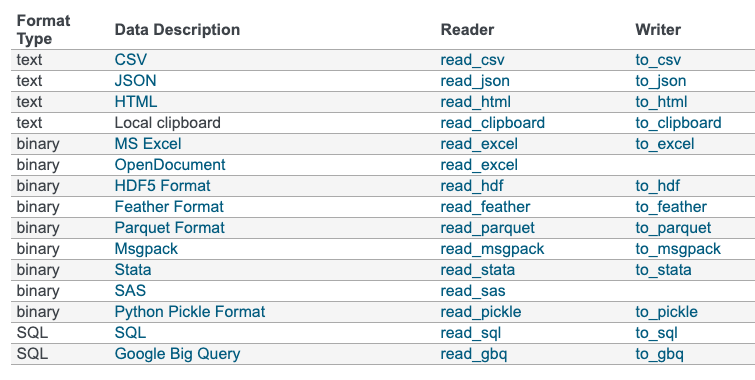



### **`read_csv` method**

The first method we'll learn is **read_csv**, that let us read comma-separated values (CSV) files and raw text (TXT) files into a `DataFrame`.

The `read_csv` function is extremely powerful and you can specify a very broad set of parameters at import time that allow us to accurately configure how the data will be read and parsed by specifying the correct structure, enconding and other details. The most common parameters are as follows:

* `filepath`: Path of the file to be read.
* `sep`: Character(s) that are used as a field separator in the file.
* `header`: Index of the row containing the names of the columns (None if none).
* `index_col`: Index of the column or sequence of indexes that should be used as index of rows of the data.
* `names`: Sequence containing the names of the columns (used together with header = None).
* `skiprows`: Number of rows or sequence of row indexes to ignore in the load.
* `na_values`: Sequence of values that, if found in the file, should be treated as NaN.
* `dtype`: Dictionary in which the keys will be column names and the values will be types of NumPy to which their content must be converted.
* `parse_dates`: Flag that indicates if Python should try to parse data with a format similar to dates as dates. You can enter a list of column names that must be joined for the parsing as a date.
* `date_parser`: Function to use to try to parse dates.
* `nrows`: Number of rows to read from the beginning of the file.
* `skip_footer`: Number of rows to ignore at the end of the file.
* `encoding`: Encoding to be expected from the file read.
* `squeeze`: Flag that indicates that if the data read only contains one column the result is a Series instead of a DataFrame.
* `thousands`: Character to use to detect the thousands separator.
* `decimal`: Character to use to detect the decimal separator.
* `skip_blank_lines`: Flag that indicates whether blank lines should be ignored.

Full `read_csv` documentation can be found here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In this case we'll try to read our **btc-market-price.csv** CSV file using different parameters to parse it correctly.

This file contains records of the mean price of `Bitcoin` per date.

---

#### **Reading our first CSV file**

Everytime we call `read_csv` method, we'll need to pass an explicit `filepath` parameter indicating the path where our CSV file is.

Any valid string path is acceptable. The string could be a **URL**. Valid URL schemes include `HTTP`, `FTP`, `S3`, and `file`. For file URLs, a host is expected. A local file could be: `file://localhost/path/to/table.csv`.

For example we can use `read_csv` method to load data directly from an URL:

In [492]:
csv_url = "https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv"

pd.read_csv(csv_url).head(25) # first 25 lines or rows 
# pd.read_csv(csv_url).tail(8) # last 8 lines or rows

,Country Name,Country Code,Year,Value
0,Afghanistan,AFG,2000,3.521418e+09
1,Afghanistan,AFG,2001,2.813572e+09
2,Afghanistan,AFG,2002,3.825701e+09
3,Afghanistan,AFG,2003,4.520947e+09
4,Afghanistan,AFG,2004,5.224897e+09
5,Afghanistan,AFG,2005,6.203257e+09
6,Afghanistan,AFG,2006,6.971758e+09
7,Afghanistan,AFG,2007,9.747886e+09
8,Afghanistan,AFG,2008,1.010930e+10
9,Afghanistan,AFG,2009,1.241615e+10


Or just use a local file:

In [493]:
df = pd.read_csv('files/btc-market-price.csv')

df.head()

,2/4/17 0:00,1099.169125
0,3/4/17 0:00,1141.813
1,4/4/17 0:00,?
2,5/4/17 0:00,1133.079314
3,6/4/17 0:00,-
4,7/4/17 0:00,-


In this case we let pandas infer everything related to our data, but in most of the cases we'll need to explicitly tell pandas how we want our data to be loaded. To do that we use parameters.

Let's see how theses parameters work.

---

#### **First row behaviour with `header` parameter**

The CSV file we're reading has only two columns: `Timestamp` and `Price`. It doesn't have a header. **Pandas** automatically assigned the first row of data as headers, which is incorrect. We can overwrite this behavior with the `header` parameter.

In [494]:
df = pd.read_csv('files/btc-market-price.csv',
                 header=None, # no header
                 )

In [495]:
df.head()   # first 5 rows

,0,1
0,2/4/17 0:00,1099.169125
1,3/4/17 0:00,1141.813
2,4/4/17 0:00,?
3,5/4/17 0:00,1133.079314
4,6/4/17 0:00,-


---

#### **Missing values with `na_values` parameter**

We can define a `na_values` parameter with the values we want to be recognized as `NA/NaN`. In this case empty strings `''`, `?` and `-` will be recognized as **null** values.

In [496]:
df = pd.read_csv('files/btc-market-price.csv',
                 header=None,
                 na_values=['', '?', '-']) # missing values are replaced with NaN values

In [497]:
df.head()

,0,1
0,2/4/17 0:00,1099.169125
1,3/4/17 0:00,1141.813000
2,4/4/17 0:00,NaN
3,5/4/17 0:00,1133.079314
4,6/4/17 0:00,NaN


---

#### **Column names using `names` parameter**

We'll add that columns names using the `names` parameter.

In [498]:
df = pd.read_csv('files/btc-market-price.csv',
                 header=None,
                 na_values=['', '?', '-'],
                 names=['Timestamp', 'Price']) # renaming columns 

In [499]:
df.head()

,Timestamp,Price
0,2/4/17 0:00,1099.169125
1,3/4/17 0:00,1141.813000
2,4/4/17 0:00,NaN
3,5/4/17 0:00,1133.079314
4,6/4/17 0:00,NaN


---

#### **Column types using `dtype` parameter**

Without using the `dtype` parameter **pandas** will try to figure it out the type of each column automatically. We can use `dtype` parameter to force **pandas** to use certain `dtype`.

In this case we'll force the `Price` column to be `float``.

In [500]:
df = pd.read_csv('files/btc-market-price.csv',
                 header=None,
                 na_values=['', '?', '-'],
                 names=['Timestamp', 'Price'],
                 dtype={'Price': 'float'})

In [501]:
df.head()

,Timestamp,Price
0,2/4/17 0:00,1099.169125
1,3/4/17 0:00,1141.813000
2,4/4/17 0:00,NaN
3,5/4/17 0:00,1133.079314
4,6/4/17 0:00,NaN


In [502]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

The `Timestamp` column was interpreted as a regular string (`object` in pandas notation), we can parse it manually using a vectorized operation as we saw on previous courses.

We'll parse `Timestamp` column to `Datetime` objects using `to_datetime` method:

In [503]:
pd.to_datetime(df['Timestamp']).head()

C:\Users\User\AppData\Local\Temp\ipykernel_15696\1027740461.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['Timestamp']).head()


0   2017-02-04
1   2017-03-04
2   2017-04-04
3   2017-05-04
4   2017-06-04
Name: Timestamp, dtype: datetime64[ns]

In [504]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

C:\Users\User\AppData\Local\Temp\ipykernel_15696\766710655.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [505]:
df.head()

,Timestamp,Price
0,2017-02-04,1099.169125
1,2017-03-04,1141.813000
2,2017-04-04,NaN
3,2017-05-04,1133.079314
4,2017-06-04,NaN


In [506]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

---

#### **Date parser using `parse_dates` parameter**

Another way of dealing with `Datetime` objects is using `parse_dates` parameter with the position of the columns with dates.

In [507]:
df = pd.read_csv('files/btc-market-price.csv',
                 header=None,
                 na_values=['', '?', '-'],
                 names=['Timestamp', 'Price'],
                 dtype={'Price': 'float'},
                 parse_dates=[0])

C:\Users\User\AppData\Local\Temp\ipykernel_15696\1966646381.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('files/btc-market-price.csv',


In [508]:
df.head()   

,Timestamp,Price
0,2017-02-04,1099.169125
1,2017-03-04,1141.813000
2,2017-04-04,NaN
3,2017-05-04,1133.079314
4,2017-06-04,NaN


In [509]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

---

#### **Adding index to our data using `index_col` parameter**
By default, pandas will automatically assign a numeric autoincremental index or row label starting with zero. You may want to leave the default index as such if your data doesn’t have a column with unique values that can serve as a better index. In case there is a column that you feel would serve as a better index, you can override the default behavior by setting `index_col` property to a column. It takes a numeric value representing the index or a string of the column name for setting a single column as index or a list of numeric values or strings for creating a multi-index.

In our data, we are choosing the first column, `Timestamp`, as index (index=0) by passing zero to the `index_col` argument.


In [510]:
df = pd.read_csv('files/btc-market-price.csv',
                 header=None,
                 na_values=['', '?', '-'],
                 names=['Timestamp', 'Price'],
                 dtype={'Price': 'float'},
                 parse_dates=[0],
                 index_col=[0])

C:\Users\User\AppData\Local\Temp\ipykernel_15696\1116264253.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('files/btc-market-price.csv',


In [511]:
df.head()

,Price
Timestamp,
2017-02-04,1099.169125
2017-03-04,1141.813000
2017-04-04,NaN
2017-05-04,1133.079314
2017-06-04,NaN


In [512]:
df.dtypes

Price    float64
dtype: object

---

#### **A more challenging parsing**

Now we'll read another CSV file. This file has the following columns:

* `first_name`
* `last_name`
* `age`
* `math_score`
* `french_score`
* `next_test_date`

Let's read it and see how it looks like.

In [513]:
exam_df = pd.read_csv('files/exam_review.csv')

In [514]:
exam_df

,,first_name>last_name>age>math_score>french_score
"Ray>Morley>18>""68","000"">""75","000"""
Melvin>Scott>24>77>83,NaN,NaN
Amirah>Haley>22>92>67,NaN,NaN
"Gerard>Mills>19>""78","000"">72",NaN
Amy>Grimes>23>91>81,NaN,NaN


---

#### **Custom data delimiters using `sep` parameter**

We can define which delimiter to use by using the `sep` parameter. If we don't use the `sep` parameter, **pandas** will automatically detect the separator.

In most of the CSV files separator will be comma `(,)` and will be automatically detected. But we can find files with other separators like semicolon `(;)`, tabs `(\t, specially on TSV files)`, `whitespaces` or any other special character.

In this case the separator is a `>` character, which is not detected by **pandas**, since it is not a common separator. We can use the `sep` parameter to define it.

In [515]:
exam_df = pd.read_csv('files/exam_review.csv',
                      sep='>')

In [516]:
exam_df

,first_name,last_name,age,math_score,french_score
0,Ray,Morley,18,"68,000","75,000"
1,Melvin,Scott,24,77,83
2,Amirah,Haley,22,92,67
3,Gerard,Mills,19,"78,000",72
4,Amy,Grimes,23,91,81


---

#### **Custom data encoding**

Files are stored using different "encodings". You've probably heard about ASCII, UTF-8, latin1, etc.

While reading data custom encoding can be defined with the `encoding` parameter.

* `encoding='UTF-8`': will be used if data is UTF-8 encoded.
* `encoding='iso-8859-1'`: will be used if data is ISO/IEC 8859-1 ("extended ASCII") encoded.

**UTF-8** encoding can be used because it is the most common encoding used in the web. It is a variable-length character encoding for Unicode, which means that it can represent any character in the Unicode standard. It is widely used because it is backward compatible with ASCII and can represent characters from many different languages.

**ISO-8859-1** is a single-byte character encoding that can represent the first 256 Unicode characters. It is commonly used in Western European languages and is often used in legacy systems. It is not as widely used as UTF-8, but it is still important for compatibility with older systems and applications.

In our case we don't need a custom enconding as data is properly loaded.

---

#### **Custom numeric `decimal` and `thousands` character**

The decimal and thousands characters could change between datasets. If we have a column containing a comma `(,)` to indicate the decimal or thousands place, then this column would be considered a string and not numeric.

In [517]:
exam_df = pd.read_csv('files/exam_review.csv',
                      sep='>')

In [518]:
exam_df

,first_name,last_name,age,math_score,french_score
0,Ray,Morley,18,"68,000","75,000"
1,Melvin,Scott,24,77,83
2,Amirah,Haley,22,92,67
3,Gerard,Mills,19,"78,000",72
4,Amy,Grimes,23,91,81


In [519]:
exam_df[['math_score', 'french_score']].dtypes

math_score      object
french_score    object
dtype: object

To solve that, ensuring such columns are interpreted as integer values, we'll need to use the `decimal` and/or `thousands` parameters to indicate correct decimal and/or thousands indicators.

In [520]:
exam_df = pd.read_csv('files/exam_review.csv',
                      sep='>',
                      decimal=',')

In [521]:
exam_df

,first_name,last_name,age,math_score,french_score
0,Ray,Morley,18,68.0,75.0
1,Melvin,Scott,24,77.0,83.0
2,Amirah,Haley,22,92.0,67.0
3,Gerard,Mills,19,78.0,72.0
4,Amy,Grimes,23,91.0,81.0


In [522]:
exam_df[['math_score', 'french_score']].dtypes

math_score      float64
french_score    float64
dtype: object

In [523]:
exam_df= pd.read_csv('files/exam_review.csv',
            sep='>',
            thousands=',')

In [524]:
exam_df[['math_score', 'french_score']].dtypes

math_score      int64
french_score    int64
dtype: object

In [525]:
exam_df

,first_name,last_name,age,math_score,french_score
0,Ray,Morley,18,68000,75000
1,Melvin,Scott,24,77,83
2,Amirah,Haley,22,92,67
3,Gerard,Mills,19,78000,72
4,Amy,Grimes,23,91,81


---

#### **Excluding specific rows**

We can use the `skiprows` to:

* Exclude reading specified number of rows from the beginning of a file, by passing an integer argument. **This removes the header too**.
* Skip reading specific row indices from a file, by passing a list containing row indices to skip.

In [526]:
exam_df = pd.read_csv('files/exam_review.csv',
                      sep='>',
                      decimal=',')

In [527]:
exam_df

,first_name,last_name,age,math_score,french_score
0,Ray,Morley,18,68.0,75.0
1,Melvin,Scott,24,77.0,83.0
2,Amirah,Haley,22,92.0,67.0
3,Gerard,Mills,19,78.0,72.0
4,Amy,Grimes,23,91.0,81.0


To skip reading the first 2 rows from this file, we can use `skiprows=2`
:

In [528]:
pd.read_csv('files/exam_review.csv',
                      sep='>',
                      decimal=',',
                      skiprows=2) # skipping first 2 rows

,Melvin,Scott,24,77,83
0,Amirah,Haley,22,92.0,67
1,Gerard,Mills,19,78.0,72
2,Amy,Grimes,23,91.0,81


As the header is considered as the first row, to skip reading data rows 1 and 3, we can use `skiprows=[1,3]`:

In [529]:
exam_df = pd.read_csv('files/exam_review.csv',
                      sep='>',
                      decimal=',',
                      skiprows=[1,3])

In [530]:
exam_df

,first_name,last_name,age,math_score,french_score
0,Melvin,Scott,24,77.0,83
1,Gerard,Mills,19,78.0,72
2,Amy,Grimes,23,91.0,81


---

#### **Get rid of blank lines**

The `skip_blank_lines` parameter is set to `True` so blank lines are skipped while we read files.

If we set this parameter to `False`, then every blank line will be loaded with `NaN` values into the `DataFrame`.

In [531]:
pd.read_csv('files/exam_review.csv',
            sep='>',
            skip_blank_lines=False)

,first_name,last_name,age,math_score,french_score
0,Ray,Morley,18.0,"68,000","75,000"
1,Melvin,Scott,24.0,77,83
2,Amirah,Haley,22.0,92,67
3,NaN,NaN,NaN,NaN,NaN
4,Gerard,Mills,19.0,"78,000",72
5,Amy,Grimes,23.0,91,81
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN


In [532]:
pd.read_csv('files/exam_review.csv',
            sep='>',
            skip_blank_lines=True) # skipping blank lines

,first_name,last_name,age,math_score,french_score
0,Ray,Morley,18,"68,000","75,000"
1,Melvin,Scott,24,77,83
2,Amirah,Haley,22,92,67
3,Gerard,Mills,19,"78,000",72
4,Amy,Grimes,23,91,81


---

#### **Loading specific columns**

We can use the `usecols` parameter when we want to load just specific columns and not all of them.

Performance wise, it is better because instead of loading an entire `dataframe` into memory and then deleting the not required columns, we can select the columns that we’ll need, while loading the dataset itself.

As a parameter to `usecols`, you can pass either a list of strings corresponding to the column names or a list of integers corresponding to column index.

In [533]:
pd.read_csv('files/exam_review.csv',
            # usecols= ['first_name', 'last_name', 'age'], # using the column names
            usecols=[0, 1, 2], # using the column index position
            sep='>')

,first_name,last_name,age
0,Ray,Morley,18
1,Melvin,Scott,24
2,Amirah,Haley,22
3,Gerard,Mills,19
4,Amy,Grimes,23


---

### Using a `Series` instead of `DataFrame`

If the parsed data only contains one column then we can return a `Series` by setting the `squeeze` parameter to `True`.

In [534]:
exam_test_1 = pd.read_csv('files/exam_review.csv',
                          sep='>',
                          usecols=['last_name'])

In [535]:
type(exam_test_1)

pandas.core.frame.DataFrame

In [536]:
exam_test_2 = pd.read_csv('files/exam_review.csv',
                          sep='>',
                          usecols=['last_name'],
                            ) 

In [537]:
exam_test_2 # dataframe only with one column 

,last_name
0,Morley
1,Scott
2,Haley
3,Mills
4,Grimes


Let´s convert the `DataFrame` to a `Series` using the `squeeze` parameter:

In [538]:
exam_test_2 = exam_test_2.squeeze()

In [539]:
type(exam_test_2)

pandas.core.series.Series

---

### Save to CSV file

Finally we can also save our `DataFrame` as a CSV file.

In [540]:
exam_df

,first_name,last_name,age,math_score,french_score
0,Melvin,Scott,24,77.0,83
1,Gerard,Mills,19,78.0,72
2,Amy,Grimes,23,91.0,81


In [541]:
exam_df.to_csv()

',first_name,last_name,age,math_score,french_score\r\n0,Melvin,Scott,24,77.0,83\r\n1,Gerard,Mills,19,78.0,72\r\n2,Amy,Grimes,23,91.0,81\r\n'

Or specify a file path where we want our generated CSV code to be saved:

In [542]:
exam_df.to_csv('files/out.csv')

In [543]:
pd.read_csv('files/out.csv')

,Unnamed: 0,first_name,last_name,age,math_score,french_score
0,0,Melvin,Scott,24,77.0,83
1,1,Gerard,Mills,19,78.0,72
2,2,Amy,Grimes,23,91.0,81


In [544]:
exam_df.to_csv('files/out.csv',
               index=None)

In [545]:
pd.read_csv('files/out.csv')

,first_name,last_name,age,math_score,french_score
0,Melvin,Scott,24,77.0,83
1,Gerard,Mills,19,78.0,72
2,Amy,Grimes,23,91.0,81
